# Paria Rezayan
# Dimensionality Reduction Using PCA and LDA for a Classification Task

# Introduction:
The main objective of this project is to classify breast cancer patients and healthy controls using machine learning techniques. The dataset used in this project can be found on https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra, and contains measurements such as age, BMI, glucose, insulin, and other biomarkers.

# Dataset:
The dataset consists of 116 rows and 10 columns. The columns contain numerical values, and there are no null values in the dataset.

# Objective:
The objective of this project is to build a classification model that can accurately distinguish between breast cancer patients and healthy controls. The dataset is preprocessed, and two different dimensionality reduction techniques, PCA and LDA, are applied to identify the most important features.

# Methodology:
1. Preprocessed the dataset by scaling it and splitting it into training and testing sets
2. Used PCA to identify the most important features in the dataset by transforming the data into a new set of variables
3. Applied logistic regression to the dataset after being condensed using PCA
4. Evaluated the model by calculating various classification metrics such as accuracy, precision, recall, F1 score, and ROC AUC score
5. Used LDA for finding a linear combination of features that best discriminates between different classes
6. Apploed logistic regression to the dataset after being condensed using LDA
7. Evaluated the model by calculating various classification metrics such as accuracy, precision, recall, F1 score, and ROC AUC score
8. Compared the two classification models after PCA (Model 1) and LDA (Model 2)

# Loading and Exploring the Dataset

In this section, the necessary libraries and the dataset are loaded, and then several exploratory methods are used to familiarize ourselves with the data:

In [2]:
# importing the necessary libraries
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import sklearn 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve
import seaborn as sns 

In [3]:
# loading the data 
data = pd.read_csv('breast_cancer.csv')

In [5]:
# getting to know the dataset
data.shape

(116, 10)

The raw data consists of 116 rows and 10 columns.

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


Attribute Information:
1. Age (years)
2. BMI (kg/m2)
3. Glucose (mg/dL)
4. Insulin (µU/mL)
5. HOMA
6. Leptin (ng/mL)
7. Adiponectin (µg/mL)
8. Resistin (ng/mL)
9. MCP-1(pg/dL)

Labels:
1 = Healthy controls
2 = Patients

In [7]:
data.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,1
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,1
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,1
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,1
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,1


In [8]:
data.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,1.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,1.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474283,6.881763,269.978250,1.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,2.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,2.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,2.000000


In [9]:
# checking for non-numeric data points
data.dtypes

Age                 int64
BMI               float64
Glucose             int64
Insulin           float64
HOMA              float64
Leptin            float64
Adiponectin       float64
Resistin          float64
MCP.1             float64
Classification      int64
dtype: object

As demonstrated, all the columns contain numerical values

In [10]:
# cheking for total count of nan values
print(data.isnull().sum().sum())

0


# Data Preprocessing: 

In this section, the data is preprocessed by scaling the data, and then splitting it into training and testing sets:

In [12]:
# defining x and y
col_names = data.columns.tolist()
col_names.remove("Classification")
x = data.loc[:, col_names]
y = data.loc[:, "Classification"]

In [13]:
# preprocessing 
scaler = StandardScaler()
scaled_x = scaler.fit_transform(x)

In [14]:
# printting the first 5 rows of the x array
print(scaled_x[:5])

[[-0.57979363 -0.81667527 -1.23922225 -0.72873938 -0.61428241 -0.93233407
  -0.07022151 -0.54551749 -0.34125061]
 [ 1.60182096 -1.37875056 -0.25829943 -0.68803819 -0.54824045 -0.93041264
  -0.69734988 -0.86421418 -0.1912238 ]
 [ 1.53948912 -0.89176446 -0.30288683 -0.55007314 -0.46475236 -0.45421914
   1.79799836 -0.4416602   0.05821407]
 [ 0.66684328 -1.24330321 -0.92711044 -0.67696507 -0.57420965 -0.87602119
  -0.44194467 -0.15886735  1.14271758]
 [ 1.7888165  -1.29460116 -0.25829943 -0.6447433  -0.52108087 -1.04268238
  -0.78688094 -0.33635201  0.69471601]]


In [15]:
# splitting into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(scaled_x, y, test_size=0.25, random_state=0)

In [16]:
x_train.shape

(87, 9)

In [17]:
x_test.shape

(29, 9)

# Dimensionality Reduction using PCA:

The next step in this classification project is to use PCA for identifying the most important features in the dataset by transforming the data into a new set of variables called principal components:

In [18]:
# initialize PCA with all components
pca = PCA(n_components = x_train.shape[1])
pca.fit(x_train)

PCA(n_components=9)

In [19]:
# calculating the variance explained by each principal component
variance_ratios = pca.explained_variance_ratio_
print(variance_ratios)

[0.33093471 0.15415912 0.14131269 0.13212096 0.08810296 0.06631177
 0.04993219 0.03384928 0.00327633]


In [20]:
# calculating the cumulative sum of variance ratios
total_variances = np.cumsum(variance_ratios)
print(total_variances)

[0.33093471 0.48509383 0.62640652 0.75852747 0.84663043 0.9129422
 0.96287439 0.99672367 1.        ]


In [21]:
# finding the optimal number of components that explain at least 95% variance
optimal_num_components = len(total_variances[total_variances < 0.95]) + 1
print(optimal_num_components)

7


In [22]:
# pca implementation 
pca_model = PCA(n_components=7)
x_train_1 = pca_model.fit_transform(x_train)
x_test_1 = pca_model.fit_transform(x_test)

In [23]:
print(x_train_1[:5])

[[ 2.19371853 -0.07441907  1.54958042  0.2396701  -1.59341642 -0.54215144
  -0.04521363]
 [ 1.01648863 -0.70331427  0.37829746 -1.01281188 -1.87012806  0.16819431
  -1.04193747]
 [-0.79053196 -0.39122349 -0.2944726   0.89919079  0.05234449 -0.2711025
  -0.00668867]
 [-1.2877078   1.22879459 -1.22156349 -0.27238685 -0.20261977  0.61773847
  -0.45884406]
 [-0.0451918  -1.0636857   0.06090113  1.32231329  0.0076772  -0.00755573
  -0.35958109]]


# Logistic Regression after PCA:

Here, logistic regression is applied to the dataset after being condensed using PCA.

In [24]:
# LR after pca
LR_model = LogisticRegression(random_state = 0)
LR_model.fit(x_train_1,y_train)
y_pred_1 = LR_model.predict(x_test_1)

# Model Evaluation: 
Next, the model is evaluated by calculating various classification metrics such as accuracy, precision, recall, F1 score, and ROC AUC score.

In [25]:
# pritting the confusion matrix of the model
cm_1 = confusion_matrix(y_test, y_pred_1)
print(cm_1)

[[ 5  7]
 [10  7]]


<Axes: >

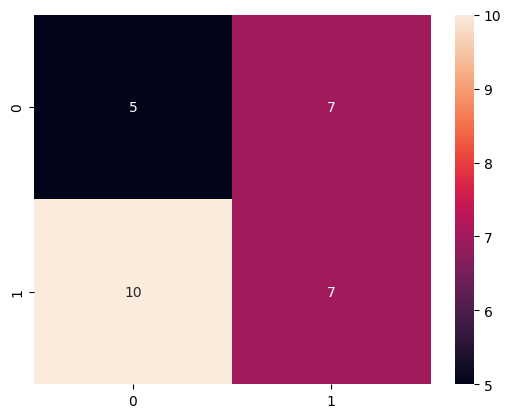

In [26]:
sns.heatmap(cm_1 , annot=True)

In [27]:
# calculating various classification metrics
accuracy_1 = accuracy_score(y_test, y_pred_1)
print('Accuracy', accuracy_1)

percision_1 = precision_score(y_test, y_pred_1)
print('Precision:', percision_1)

recall_1 = recall_score(y_test, y_pred_1)
print('Recall:', recall_1)

f1_1 = f1_score(y_test, y_pred_1)
print('F1 Score:', f1_1)

roc_auc_1 = roc_auc_score(y_test, y_pred_1)
print('ROC AUC Score:', roc_auc_1)

Accuracy 0.41379310344827586
Precision: 0.3333333333333333
Recall: 0.4166666666666667
F1 Score: 0.3703703703703704
ROC AUC Score: 0.4142156862745098


# Dimensionality Reduction using LDA:

The subsequent step in our classification project is to use LDA for finding a linear combination of features that best discriminates between different classes:

In [28]:
# LDA
lda_model = LinearDiscriminantAnalysis()
x_train_2 = lda_model.fit_transform(x_train, y_train)
x_test_2 = lda_model.fit_transform(x_test, y_test)

In [29]:
print(x_train_2[:5])

[[ 1.22359623]
 [-0.05720438]
 [-0.81754262]
 [-0.78173735]
 [-0.81279325]]


# Logistic Regression after LDA:

And now, logistic regression is applied to the dataset after being condensed using LDA.

In [30]:
# LR after lda
LR_model_2 = LogisticRegression(random_state = 0)
LR_model_2.fit(x_train_2,y_train)
y_pred_2 = LR_model_2.predict(x_test_2)

# Model Evaluation:

Thus goes the evaluation process for the model with LDA:

In [31]:
# printting confusion matrix of the model
cm_2 = confusion_matrix(y_test, y_pred_2)
print(cm_2)

[[ 9  3]
 [ 4 13]]


<Axes: >

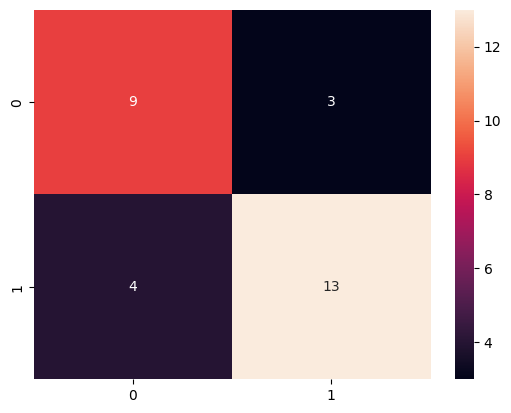

In [32]:
sns.heatmap(cm_2 , annot=True)

In [33]:
# calculating various classification metrics
accuracy_2 = accuracy_score(y_test, y_pred_2)
print('Accuracy', accuracy_2)

percision_2 = precision_score(y_test, y_pred_2)
print('Precision:', percision_2)

recall_2 = recall_score(y_test, y_pred_2)
print('Recall:', recall_2)

f1_2 = f1_score(y_test, y_pred_2)
print('F1 Score:', f1_2)

roc_auc_2 = roc_auc_score(y_test, y_pred_2)
print('ROC AUC Score:', roc_auc_2)

Accuracy 0.7586206896551724
Precision: 0.6923076923076923
Recall: 0.75
F1 Score: 0.7199999999999999
ROC AUC Score: 0.7573529411764706


# A comparison of the two classification models after PCA (Model 1) and LDA (Model 2): 

In [34]:
# calculating the ROC curve for the first model
fpr_1, tpr_1, thresholds_1 = roc_curve(y_test, y_pred_1, pos_label=2)
# calculating the ROC curve for the second model
fpr_2, tpr_2, thresholds_2 = roc_curve(y_test, y_pred_2, pos_label=2)

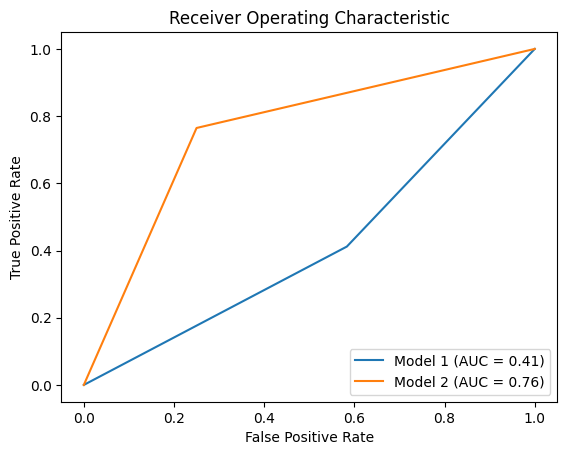

In [35]:
# plotting the ROC curves for both models
plt.plot(fpr_1, tpr_1, label='Model 1 (AUC = %0.2f)' % roc_auc_1)
plt.plot(fpr_2, tpr_2, label='Model 2 (AUC = %0.2f)' % roc_auc_2)
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend(loc="lower right")
plt.show()

# Conclusion

Based on statistical tests and a visualization of the ROC curves, it can be deduced that LDA is a more efficient dimensionality reduction algorithm than PCA for this dataset and in this classification task using Logistic Regression. 